# Block average of 2D arrays in python

Demonstrate a method to block average 2D arrays in python, handling masked values.

In [1]:
import numpy as np
from matplotlib import pylab as plt

The two routines needed to perform block average.

In [2]:
def blockshaped(arr, nrows, ncols):
    """
    from: http://stackoverflow.com/questions/16873441/form-a-big-2d-array-from-multiple-smaller-2d-arrays/16873755#16873755
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array looks like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

def coarsen_field(img, by=3,):
    """ coarsen the spatial resolution of an image by block averaging """
    # coarsen by block averaging 
    tsize = (np.array(img.shape)//by).astype(int)
    c = blockshaped(img[:tsize[0]*by,:tsize[1]*by],by,by).mean(axis=1).mean(axis=1).reshape(tsize)
    
    return c


Prepare dummy data for demonstration (from https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html)

In [3]:
lon = np.linspace(-80, 80, 35)
lat = np.linspace(10, 70, 55)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

In [4]:
orig_shape = data.shape
print("Original shape: ", orig_shape)

Original shape:  (55, 35)


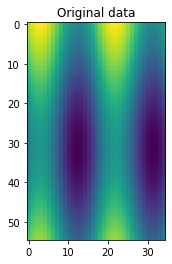

In [5]:
plt.imshow(data)
plt.gca().set_title("Original data")
plt.show()

Compute block average of the data by a factor of 5.

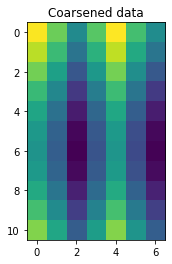

New shape:  (11, 7)


In [6]:
bavg = coarsen_field(data,by=5)

plt.imshow(bavg)
plt.gca().set_title("Coarsened data")
plt.show()
print("New shape: ", bavg.shape)

Demonstrate block averaging with masked cells.

In [7]:
data = np.ma.asarray(data)
data[5:25,15:25] = np.ma.masked
bavg = coarsen_field(data,by=5)

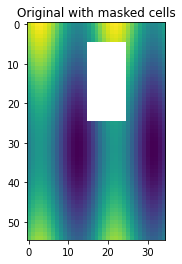

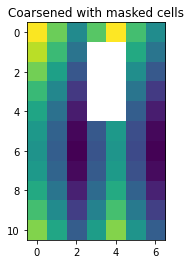

In [8]:
plt.imshow(data)
plt.gca().set_title("Original with masked cells")
plt.show()
plt.imshow(bavg)
plt.gca().set_title("Coarsened with masked cells")
plt.show()

There are many ways to develop this further, including using non-square kernels, but this is my use case.